In [1]:
# import labraries 

'''
L.S. Very good code. It looks clean and good. Moreover, your analysis is very good. Your presentation was very good.
Moreover, I like that you were able to identify specific problems and limitations of the models and suggested some
follow-ups to potentialy increase performance.
'''

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score 
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# validatieset maken van je train set bij ML model bouwen 
# zo kan je al een schatting maken van hoe je model gaat performen op je testset 

# Machine Learning Model to predict final grade students

In [3]:
# import data
data = pd.read_csv('./student-mat.csv', sep=';')

# Explore dataset

In [4]:
# print data
data.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# no missing values 
data.isna().sum().head()

school     0
sex        0
age        0
address    0
famsize    0
dtype: int64

In [6]:
# types are correct 
data.dtypes.head()

school     object
sex        object
age         int64
address    object
famsize    object
dtype: object

In [7]:
# discriptive statistics look good 
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [8]:
# check shape
data.shape

(395, 33)

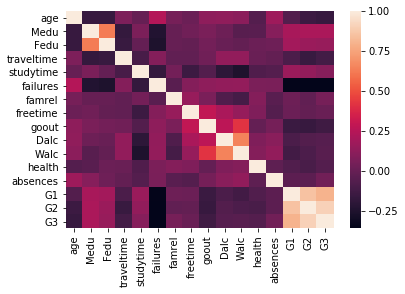

In [9]:
# check correlations numeric columns 
sns.heatmap(data.corr());

# you can see that only for G1, G2, G3 there are high correlations 
# I probably need to drop 2 and work only with 1 
# G3 = final grade,  G1 = first period grade, G2 = second period grade >> I will chose to keep G3 and drop G1&2

# Make dummy data of objects columns + decide drop columns

In [10]:
# select only object columns 
object_columns = [x for x in data.select_dtypes(include=['object']).columns]

# make dataframe with dummy data 
data_dummy = pd.get_dummies(data=data, columns=object_columns, drop_first=True)
data_dummy.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

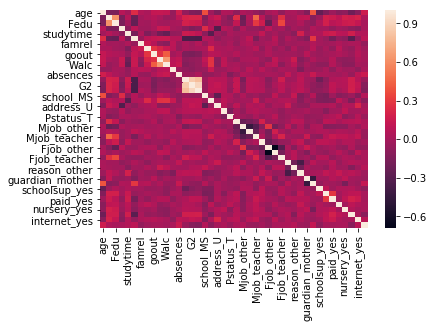

In [11]:
# check correlations all columns to deside which to drop 
sns.heatmap(data_dummy.corr()); 
#data_dummy.corr()

In [12]:
# show correlations > 0.7 
correlation_data = data.corr().unstack().drop_duplicates().sort_values(ascending=False).reset_index()
col_names =['Variable1', 'Variable2', 'correlation']
correlation_data.columns=col_names 
correlation_data = correlation_data[correlation_data.correlation!=1].reset_index()

correlation_data[correlation_data.correlation > 0.7]

,index,Variable1,Variable2,correlation
0,1,G2,G3,0.904868
1,2,G1,G2,0.852118
2,3,G1,G3,0.801468


In [13]:
# drop features G1 & G2
data_model = data_dummy.drop(['G1', 'G2'], axis=1)
data_model.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [14]:
# make column G3_catagories
data_model['G3_catagories'] = data_model['G3'].apply(lambda x: 1 if x > 10 else 0) #1=succes,0=failure
data_model['G3_catagories'].value_counts() 

1    209
0    186
Name: G3_catagories, dtype: int64

# Modeling, Prediction, and Evaluation | Classification Models 

Grade = failure(0) & success(1)

In [26]:
# define x & y + split data into test (20%) & train (80%)
data_x = data_model[data_model.columns.difference(['G3_catagories', 'G3'])]
data_y = data_model['G3_catagories']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2) 

Logistic Regression Algorithm

AUC = 0.6933719433719435

Model performance on traing set: 0.75
Model performance on testing set: 0.6962025316455697


/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



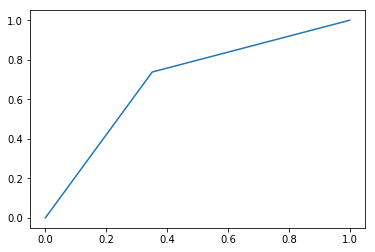

In [36]:
# make model 
model1_LR = LogisticRegression().fit(X_train, y_train)

# confusion matrix: 
confusion_matrix(y_test, model1_LR.predict(X_test))

# plot the ROC curve + AUC score
fpr, tpr, _ = metrics.roc_curve(y_test, model1_LR.predict(X_test)) 
auc = metrics.roc_auc_score(y_test, model1_LR.predict(X_test))

print('AUC =', auc)
plt.plot(fpr,tpr); 

print("\nModel performance on traing set:", model1_LR.score(X_train, y_train))
print("Model performance on testing set:", model1_LR.score(X_test, y_test)) 

Random Forest Classifier Algorithm

AUC = 0.5981338481338482

Model performance on traing set: 0.990506329113924
Model performance on testing set: 0.5949367088607594


/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



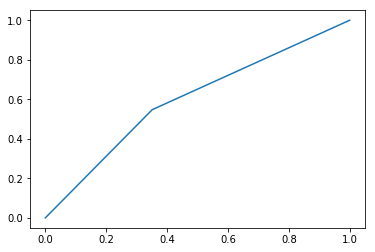

In [37]:
# make model 
model2_RF = RandomForestClassifier().fit(X_train, y_train)

# confusion matrix: 
confusion_matrix(y_test, model2_RF.predict(X_test))

# plot the ROC curve + AUC score
fpr, tpr, _ = metrics.roc_curve(y_test, model2_RF.predict(X_test)) 
auc = metrics.roc_auc_score(y_test, model2_RF.predict(X_test))

print('AUC =', auc)
plt.plot(fpr,tpr);

print("\nModel performance on traing set:", model2_RF.score(X_train, y_train))
print("Model performance on testing set:", model2_RF.score(X_test, y_test)) 

Support Vector Machine (SVM) Algorithm

AUC = 0.5981338481338482

Model performance on traing set: 0.819620253164557
Model performance on testing set: 0.6075949367088608


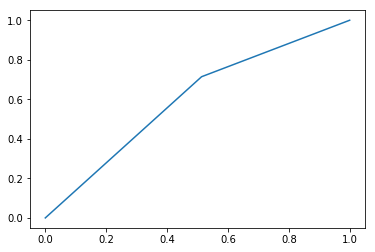

In [38]:
# make model 
model3_SVM = svm.SVC(gamma='auto', probability=True).fit(X_train, y_train) 

# confusion matrix: 
confusion_matrix(y_test, model3_SVM.predict(X_test))

# plot ROC curve + AUC score + Accuracy score 
fpr, tpr, _ = roc_curve(y_test, model3_SVM.predict(X_test))
roc_auc_score(y_test, model3_SVM.predict(X_test))

print('AUC =', auc)
plt.plot(fpr, tpr);

print("\nModel performance on traing set:", model3_SVM.score(X_train, y_train))
print("Model performance on testing set:", model3_SVM.score(X_test, y_test)) 

# Modeling, Prediction, and Evaluation | Regression Models

In [19]:
# define x & y + split data into test (20%) & train (80%)
data_x2 = data_model[data_model.columns.difference(['G3_catagories', 'G3'])]
data_y2 = data_model['G3']

X_train, X_test, y_train, y_test = train_test_split(data_x2, data_y2, test_size=0.2)

Multiple Lineair Regression Algorithm

In [20]:
# model 
model4_LR = LinearRegression().fit(X_train, y_train)

# evaluate model 
predictions = model4_LR.predict(X_test)

print('R^2 score:', r2_score(y_test, predictions))
print("\nModel performance on traing set:", model4_LR.score(X_train, y_train))
print("Model performance on testing set:", model4_LR.score(X_test, y_test))  

R^2 score: -0.06516810098721737

Model performance on traing set: 0.312736575377108
Model performance on testing set: -0.06516810098721737


K-Nearest Neighbors Algorithm

In [21]:
# model 
model5_KN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# evaluate model 
predictions = model5_KN.predict(X_test)

print('R^2 score:', r2_score(y_test, predictions))
print("\nModel performance on traing set:", model5_KN.score(X_train, y_train))
print("Model performance on testing set:", model5_KN.score(X_test, y_test))  

R^2 score: -0.46964370780426123

Model performance on traing set: 0.41455696202531644
Model performance on testing set: 0.20253164556962025


Decision Tree Alogrithm

In [22]:
# model
model6_DT = RandomForestClassifier().fit(X_train, y_train)

# evaluate model 
predictions = model6_DT.predict(X_test)

print('R^2 score:', r2_score(y_test, predictions))
print("\nModel performance on traing set:", model6_DT.score(X_train, y_train))
print("Model performance on testing set:", model6_DT.score(X_test, y_test)) 

# this model is overfitting 

R^2 score: -0.2944543916421638

Model performance on traing set: 0.9936708860759493
Model performance on testing set: 0.13924050632911392


/Users/noortjetaal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



# Conclusion

The algorithms to solve classification problems work better (G3 = success / failure) than the algorithms to solve regression problems (G3 = 0 t/m 20). But also the algorithms to solve classification problems do not perform very good. For this reason, I need to select feature again after making the model so the model will improve.

Learnings: 
- How to make a better feature selection after making the model? 
- How to see which features are the most important ones in the model so I can drop the least important ones?  